#1) Mengumpulkan data

Dataset yang digunakan merupakan dataset tentang Diabetes. sumber dataset ini berasal dari kUCI Machine Learning dengana link

##Load data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv("diabetes_data_upload.csv")

#2) Menelaah Data

In [ ]:
#menampilkan 5 data teratas
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
#menampilkan dataset terbawah
dataset.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [ ]:
#menampilkan info dari dataset baik itu tipe, nama dan jumlah dari setiap kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

#3) Menvalidasi data

In [ ]:
dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
515,False
516,False
517,False
518,False


In [ ]:
dataset.duplicated().sum()

269

In [ ]:
dataset.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [ ]:
# Menghitung jumlah nilai unik untuk setiap kolom
unique_values = {}
for col in dataset.columns:
    unique_count = dataset[col].nunique()
    unique_values[col] = unique_count

for col, count in unique_values.items():
    print(f"{col:<20} : {count:>5}")

Age                  :    51
Gender               :     2
Polyuria             :     2
Polydipsia           :     2
sudden weight loss   :     2
weakness             :     2
Polyphagia           :     2
Genital thrush       :     2
visual blurring      :     2
Itching              :     2
Irritability         :     2
delayed healing      :     2
partial paresis      :     2
muscle stiffness     :     2
Alopecia             :     2
Obesity              :     2
class                :     2


In [ ]:
#mendefinisikan kolom objek
cat_cols=[col for col in dataset.columns if dataset[col].dtype=='object']

#untuk menampilkan data unik dari setiap kolom
for col in cat_cols:
 print(f"{col} has{dataset[col].unique()}values \n")

Gender has['Male' 'Female']values 

Polyuria has['No' 'Yes']values 

Polydipsia has['Yes' 'No']values 

sudden weight loss has['No' 'Yes']values 

weakness has['Yes' 'No']values 

Polyphagia has['No' 'Yes']values 

Genital thrush has['No' 'Yes']values 

visual blurring has['No' 'Yes']values 

Itching has['Yes' 'No']values 

Irritability has['No' 'Yes']values 

delayed healing has['Yes' 'No']values 

partial paresis has['No' 'Yes']values 

muscle stiffness has['Yes' 'No']values 

Alopecia has['Yes' 'No']values 

Obesity has['Yes' 'No']values 

class has['Positive' 'Negative']values 



#4.) Menentukan objek

In [ ]:
#menampilkan info dari kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
#menampilkan data stastistik dari kolom
dataset.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


#5) Membersihkan data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#data_clean=dataset.fillna(data_clean.mode().iloc[0]) kategorikal
#data-clean=dataset.fillna(data_clean.mean())

In [ ]:
data_clean=dataset.drop_duplicates()
print(" Tampilkan semua baris duplikat")

data_clean[data_clean.duplicated(keep=False)]

 Tampilkan semua baris duplikat


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class


In [ ]:
#8. Mengubah data kategorikal menjadi numerik
#Membuat objek
le= LabelEncoder()

#Mengubah data yang bersifat kategorikal (object) menjadi data numerik
for col in cat_col:
  data_clean[col]=le.fit_transform(data_clean[col])


# Mengubah Type data dari salah satu fitur
#dataset['Bare_nuclei'] = dataset['Bare_nuclei'].astype(str).astype(float)

<ipython-input-100-6be8690073b5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col]=le.fit_transform(data_clean[col])
<ipython-input-100-6be8690073b5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col]=le.fit_transform(data_clean[col])
<ipython-input-100-6be8690073b5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 251 non-null    int64
 1   Gender              251 non-null    int64
 2   Polyuria            251 non-null    int64
 3   Polydipsia          251 non-null    int64
 4   sudden weight loss  251 non-null    int64
 5   weakness            251 non-null    int64
 6   Polyphagia          251 non-null    int64
 7   Genital thrush      251 non-null    int64
 8   visual blurring     251 non-null    int64
 9   Itching             251 non-null    int64
 10  Irritability        251 non-null    int64
 11  delayed healing     251 non-null    int64
 12  partial paresis     251 non-null    int64
 13  muscle stiffness    251 non-null    int64
 14  Alopecia            251 non-null    int64
 15  Obesity             251 non-null    int64
 16  class               251 non-null    int64
dtypes:

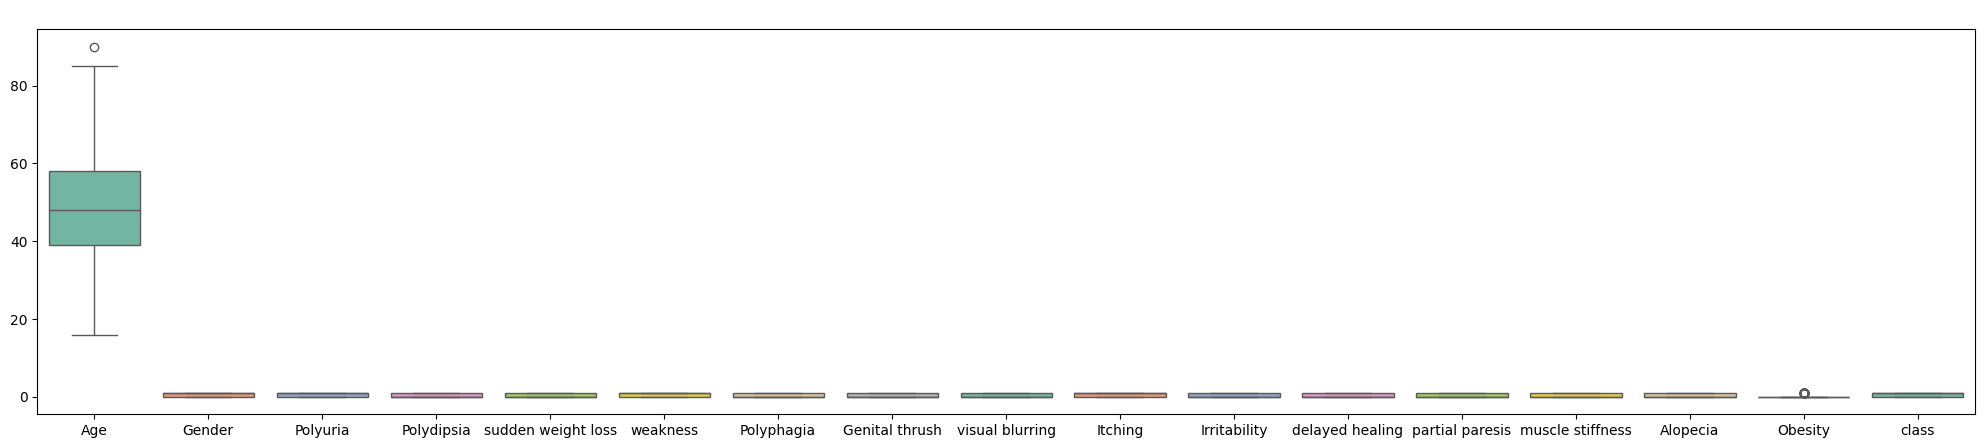

In [ ]:
plt.figure(figsize=(25,5))
sns.boxplot(data=data_clean, orient="v", palette="Set2")
plt.title(" ",fontsize=10)
plt.show()

In [ ]:
#Melakukan normalisasi outlayer dengan menggunakan metode IQR
data_iqr=data_clean.copy()
for col in data_iqr.select_dtypes(include=['int64','float64']):
  if col in['Age','Obesity']:
    Q1=data_clean[col].quantile(0.25)
    Q3=data_clean[col].quantile(0.75)
    IQR=Q1-Q3
    lower_bound=Q1-1.5 * IQR
    upper_bound=Q3+1.5 *IQR

    data_iqr[col]=data_clean[col].apply(lambda x:lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    print(f" outlier pada'{col}' telah ditangani dengan IQR")

 outlier pada'Age' telah ditangani dengan IQR
 outlier pada'Obesity' telah ditangani dengan IQR


In [ ]:
data_iqr.duplicated().sum()

39

In [ ]:
data_iqr=data_iqr.drop_duplicates()
print(" Tampilkan semua rows yang duplikat")
data_iqr[data_iqr.duplicated(keep=False)]

 Tampilkan semua rows yang duplikat


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class


#6) Mengkontruksi data

In [ ]:
#meanmpilkan data kolom
data_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 0 to 332
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 212 non-null    float64
 1   Gender              212 non-null    int64  
 2   Polyuria            212 non-null    int64  
 3   Polydipsia          212 non-null    int64  
 4   sudden weight loss  212 non-null    int64  
 5   weakness            212 non-null    int64  
 6   Polyphagia          212 non-null    int64  
 7   Genital thrush      212 non-null    int64  
 8   visual blurring     212 non-null    int64  
 9   Itching             212 non-null    int64  
 10  Irritability        212 non-null    int64  
 11  delayed healing     212 non-null    int64  
 12  partial paresis     212 non-null    int64  
 13  muscle stiffness    212 non-null    int64  
 14  Alopecia            212 non-null    int64  
 15  Obesity             212 non-null    float64
 16  class        

In [ ]:
#menampilkan stastik data
data_iqr.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0,212.000000
mean,64.811321,0.646226,0.566038,0.537736,0.424528,0.665094,0.495283,0.306604,0.476415,0.542453,0.320755,0.537736,0.466981,0.419811,0.386792,0.0,0.745283
std,9.766820,0.479272,0.496793,0.499754,0.495441,0.473075,0.501161,0.462175,0.500626,0.499374,0.467871,0.499754,0.500089,0.494696,0.488168,0.0,0.436733
min,29.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,67.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,67.500000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,67.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000
max,67.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


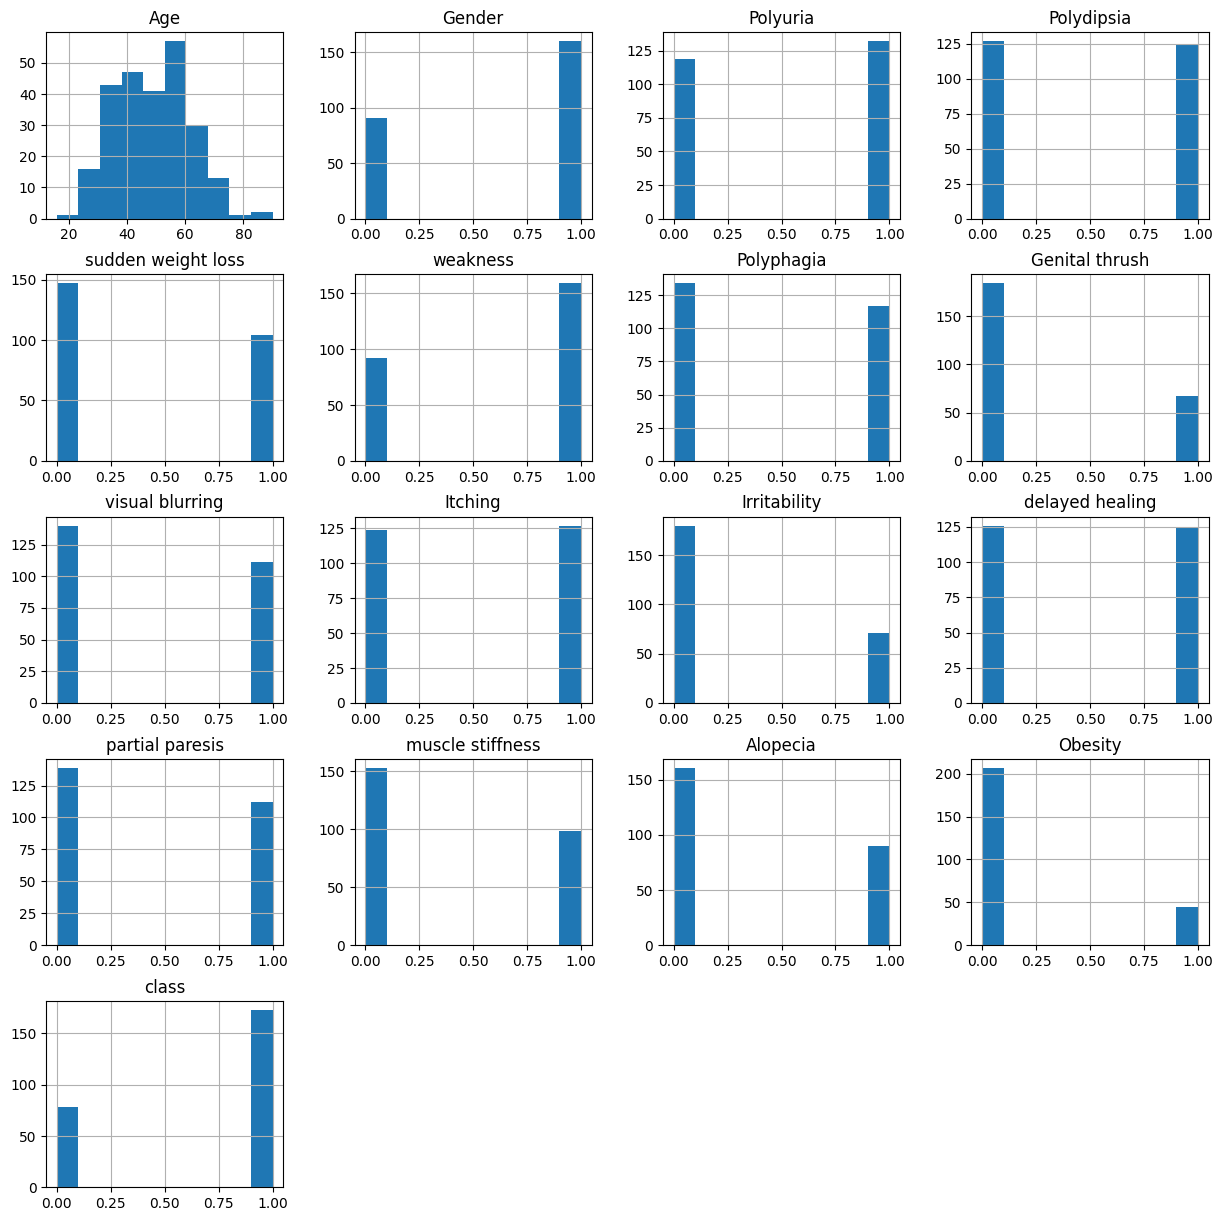

In [ ]:
data_hist=data_clean.hist(figsize=(15,15))

<Axes: >

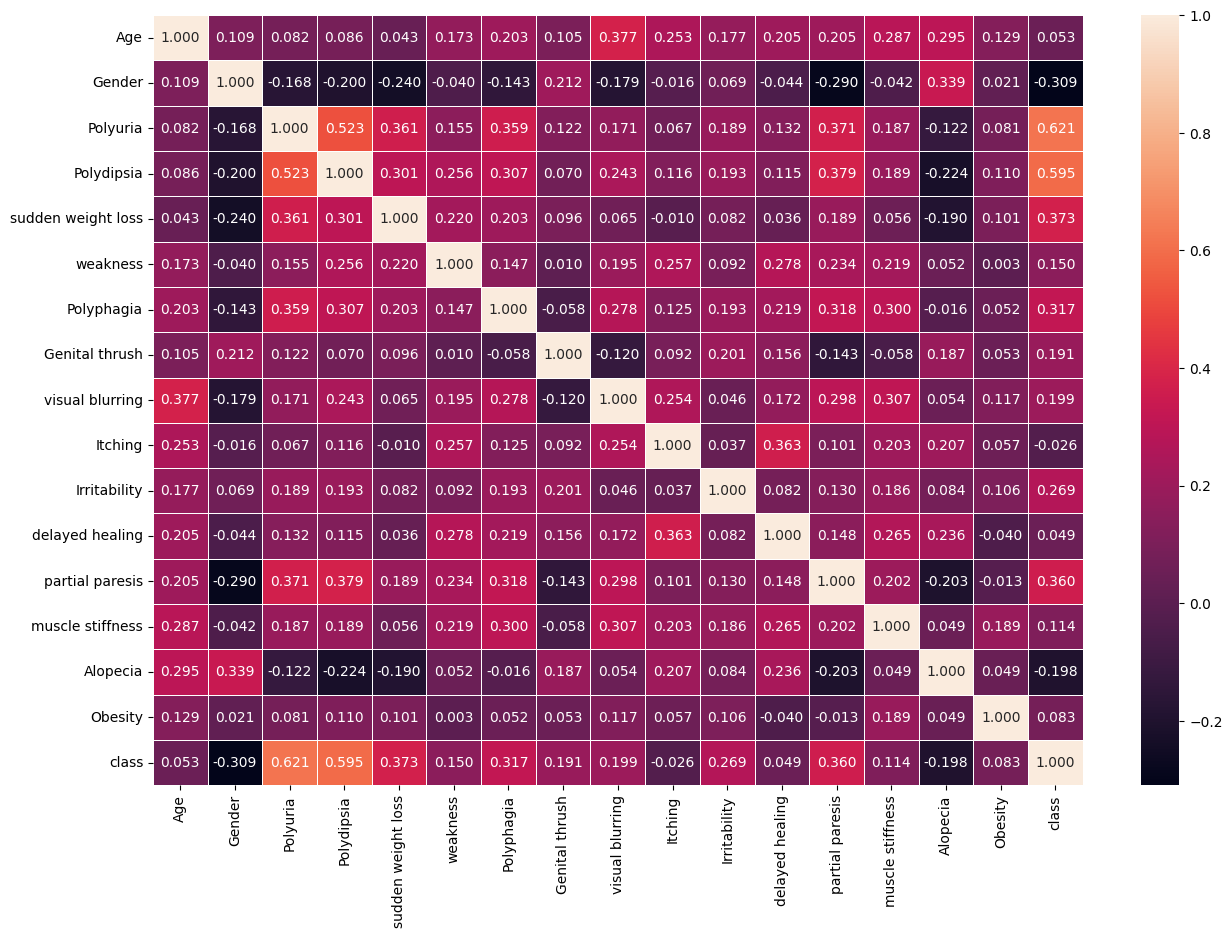

In [ ]:
#9. Menampilkan korelasi dengan heatmap
corr_mat =data_clean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corr_mat,annot=True, linewidth=0.5, fmt=".3f")

#7) Menentukan label

In [ ]:
from imblearn.over_sampling import  SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
X=data_iqr.drop("class",axis=1)
y=data_iqr["class"]

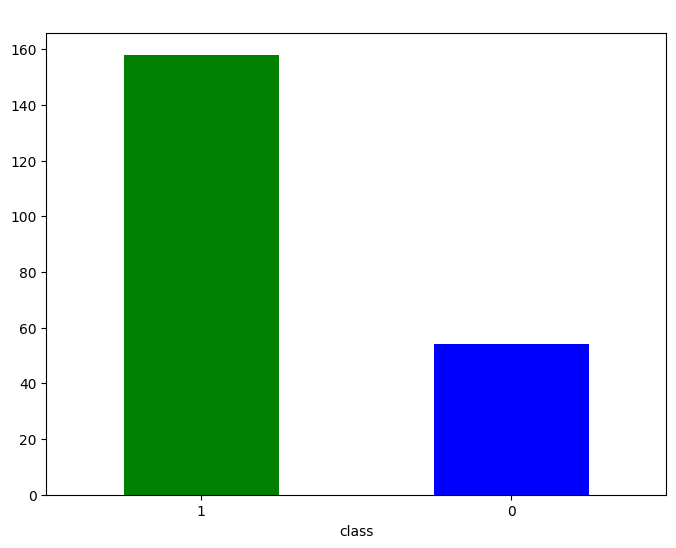

In [ ]:
data_iqr['class'].value_counts().plot(kind='bar', figsize=(8,6), color=['green','blue'])
plt.title(" ", fontsize=14)
plt.xticks(rotation=0);

In [ ]:
smote=SMOTE(random_state=42)
x_smote,y_smote=smote.fit_resample(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


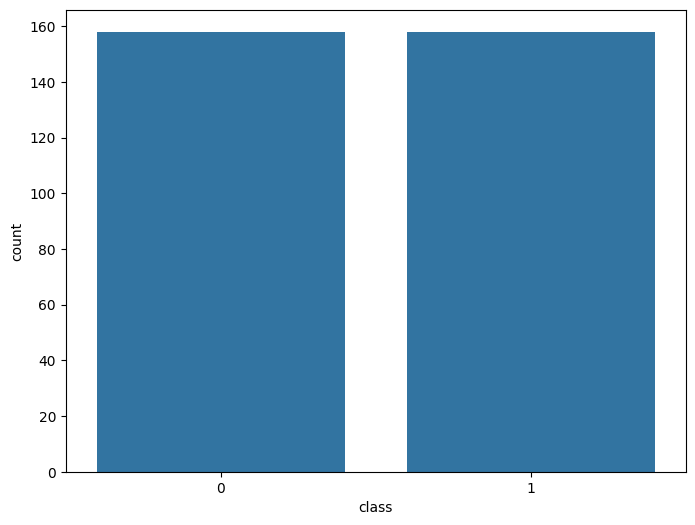

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=y_smote)
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x_smote,y_smote, test_size=0.2, random_state=42,stratify=y_smote)

#8). Membangun Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
clf= DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
nb= GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

#9) Mengevaluasi model

In [ ]:
#
y_pred1=clf.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test,y_pred1))
print("\n Laporan klasifikasi Decision Tree")
print(classification_report(y_test,y_pred1))

Accuracy Score:  0.890625

 Laporan klasifikasi Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.93      0.84      0.89        32

    accuracy                           0.89        64
   macro avg       0.89      0.89      0.89        64
weighted avg       0.89      0.89      0.89        64



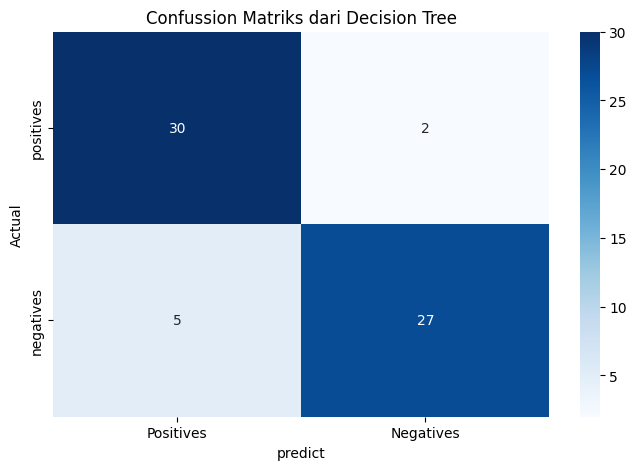

In [ ]:
# Menampilkan confussion Matrik
cm_clf=confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(8,5))
sns.heatmap(cm_clf,annot=True, fmt="d", cmap="Blues",
            xticklabels=['Positives','Negatives'],
            yticklabels=['positives','negatives'])
plt.title("Confussion Matriks dari Decision Tree")
plt.xlabel("predict")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_pred2=rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred2))
print("\n Laporan Matriks dari Random Forest ")
print(classification_report(y_test,y_pred2))

Accuracy:  0.953125

 Laporan Matriks dari Random Forest 
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        32
           1       1.00      0.91      0.95        32

    accuracy                           0.95        64
   macro avg       0.96      0.95      0.95        64
weighted avg       0.96      0.95      0.95        64



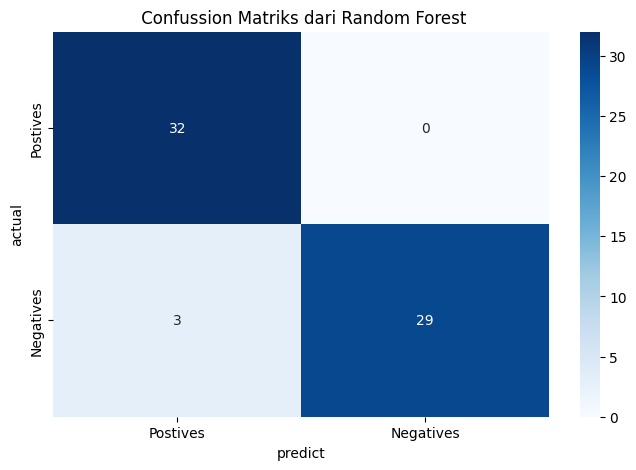

In [ ]:
cm_rf=confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(8,5))
sns.heatmap(cm_rf,annot=True,cmap="Blues",
            xticklabels=['Postives',"Negatives"],
            yticklabels=['Postives','Negatives'])
plt.title(" Confussion Matriks dari Random Forest")
plt.xlabel("predict")
plt.ylabel("actual")
plt.show()

In [ ]:
y_pred_lr = lr.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred_lr))
print("\nLaporan Metriks Logistic Regression")
print(classification_report(y_test,y_pred_lr))

Accuracy:  0.921875

Laporan Metriks Logistic Regression
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.84      0.92        32

    accuracy                           0.92        64
   macro avg       0.93      0.92      0.92        64
weighted avg       0.93      0.92      0.92        64



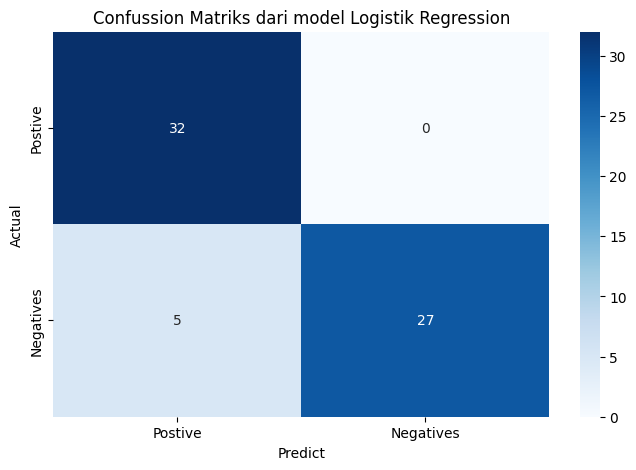

In [ ]:
cm_lr=confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize=(8,5))
sns.heatmap(cm_lr, annot=True, cmap="Blues",
            xticklabels=['Postive','Negatives'],
            yticklabels=['Postive','Negatives'])
plt.title("Confussion Matriks dari model Logistik Regression")
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_pred_nb=nb.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred_nb))
print("\n Laporan Klasifikasi Model Naive Bayes")
print(classification_report(y_test,y_pred_nb))

Accuracy score:  0.953125

 Laporan Klasifikasi Model Naive Bayes
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.97      0.94      0.95        32

    accuracy                           0.95        64
   macro avg       0.95      0.95      0.95        64
weighted avg       0.95      0.95      0.95        64



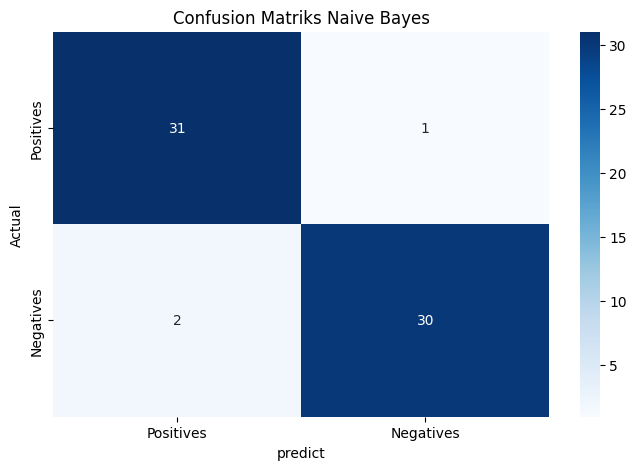

In [ ]:
cm_nb= confusion_matrix(y_test,y_pred_nb)
plt.figure(figsize=(8,5))
sns.heatmap(cm_nb, annot=True, cmap="Blues",
            xticklabels=['Positives','Negatives'],
            yticklabels=['Positives','Negatives'])
plt.title("Confusion Matriks Naive Bayes")
plt.xlabel("predict")
plt.ylabel("Actual")
plt.show()

In [ ]:
model_names=['Decision Tree','Random Forest','Logistic Regression','Naive Bayes']
accuracies=[
    accuracy_score(y_test,y_pred1),
    accuracy_score(y_test,y_pred2),
    accuracy_score(y_test,y_pred_lr),
    accuracy_score(y_test,y_pred_nb)

]

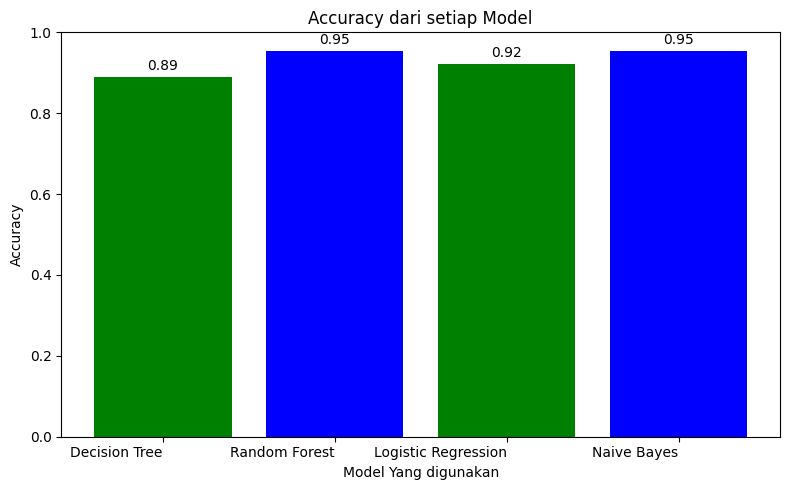

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(model_names,accuracies,color=['green','Blue'])
plt.xlabel("Model Yang digunakan")
plt.ylabel("Accuracy")
plt.title("Accuracy dari setiap Model")
plt.xticks(rotation=0, ha='right')
plt.ylim(0,1)

for i, v in enumerate(accuracies):
  plt.text(i,v+0.01, f'{v:.2f}',ha='center', va='bottom')

plt.tight_layout()
plt.show()